There are 49 positive samples and 951 negative samples


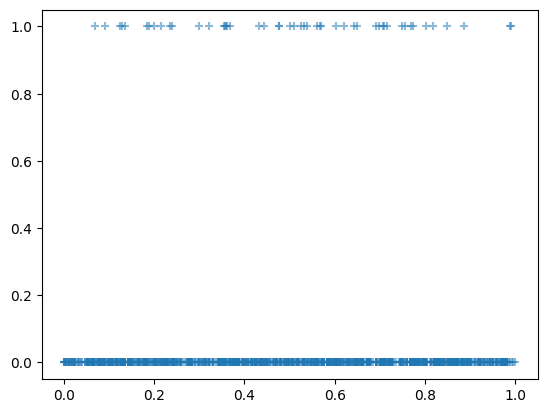

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 1000
p_positive = 0.05 # probability of positive sample

y = np.random.binomial(1, p_positive, n_samples)
random_score = np.random.rand(n_samples)
random_prediction = random_score >= (1 - p_positive)

plt.scatter(random_score, y, marker='+', alpha=0.5)

print(f'There are {y.sum()} positive samples and {n_samples - y.sum()} negative samples')

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Predicted probability', ylabel='Fraction of positives'>)

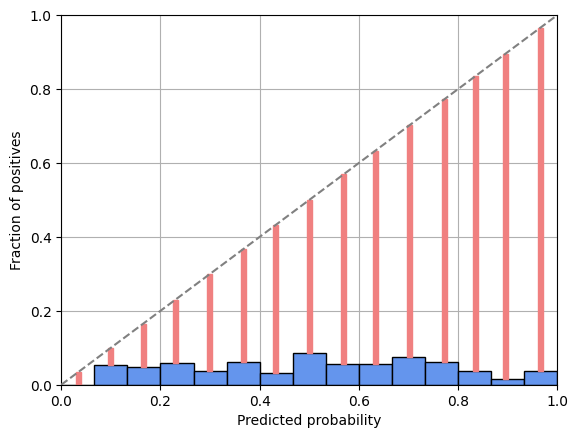

In [2]:
from pycalib.visualisations import plot_binary_reliability_diagram_gaps

plot_binary_reliability_diagram_gaps(y, random_score)

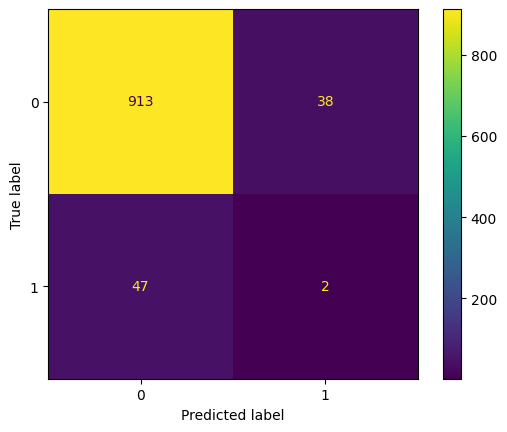

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y, random_prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [4]:
from sklearn.metrics import accuracy_score

accuracy_score(y, random_prediction)

0.915

In [5]:
from sklearn.metrics import f1_score

f1_score(y, random_prediction)

0.0449438202247191

In [6]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, random_score)

0.5039593124315972

In [7]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y, random_score)

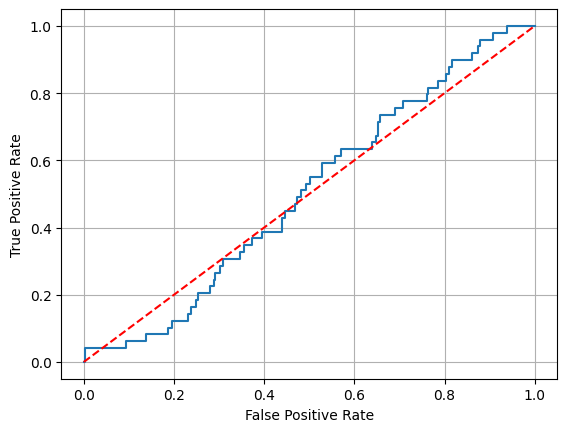

In [8]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.grid()

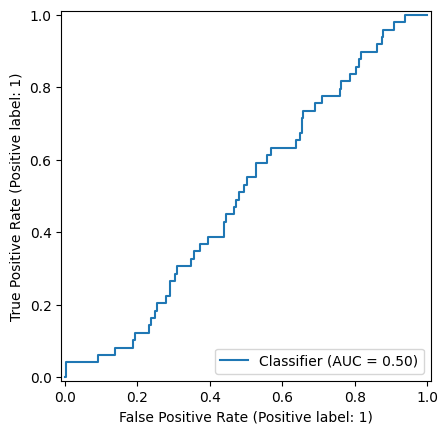

In [9]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y, random_score)

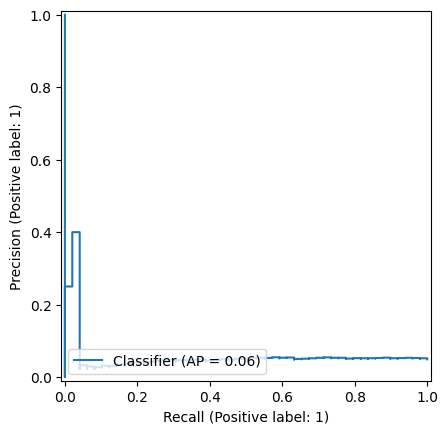

In [10]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y, random_score)

/home/mp15688/git/machine_learning_concepts/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


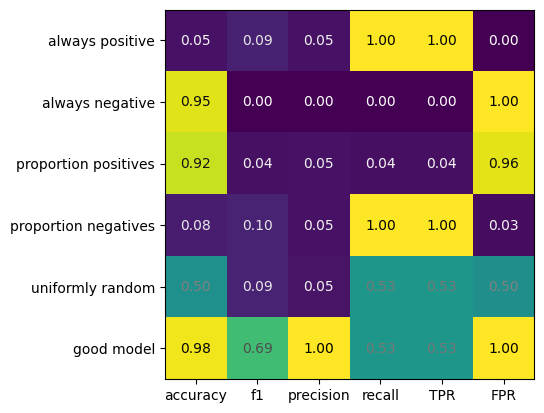

In [11]:
from sklearn.metrics import precision_score, recall_score

all_predictions = {'always positive': np.ones(n_samples),
                   'always negative': np.zeros(n_samples),
                   'proportion positives': random_score >= (1 - p_positive),
                   'proportion negatives': random_score >= p_positive,
                   'uniformly random': random_score >= 0.5,
                   'good model': ((y+1)*random_score)/2 >= 0.5}

def true_positive_rate(y_true, y_pred):
    return (y_true[y_true.astype(bool)] == y_pred[y_true.astype(bool)]).sum()/y_true.sum()

def false_positive_rate(y_true, y_pred):
    return (y_true[(1 - y_true).astype(bool)] == y_pred[(1 - y_true).astype(bool)]).sum()/(y_true == 0).sum()
    
all_metrics = {'accuracy': accuracy_score,
               'f1': f1_score,
               'precision': precision_score,
               'recall': recall_score,
               'TPR': true_positive_rate,
               'FPR': false_positive_rate}

results_matrix = np.zeros((len(all_predictions), len(all_metrics)))
for i, (metric_name, metric) in enumerate(all_metrics.items()):
    for j, (prediction_name, prediction) in enumerate(all_predictions.items()):
        measure = metric(y, prediction)
        results_matrix[j, i] = measure

fig, ax = plt.subplots()
im = ax.imshow(results_matrix)
ax.set_xticks(range(len(all_metrics)), all_metrics.keys())
ax.set_yticks(range(len(all_predictions)), all_predictions.keys())

for j, (metric_name, metric) in enumerate(all_metrics.items()):
    for i, (prediction_name, prediction) in enumerate(all_predictions.items()):
        text = ax.text(j, i, f'{results_matrix[i, j]:0.2f}', ha='center', va='center',
                       color=f'{1 - results_matrix[i, j]}')

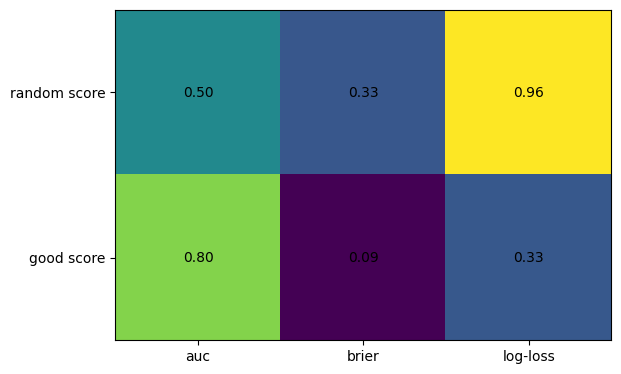

In [12]:
from sklearn.metrics import precision_score, recall_score, brier_score_loss, log_loss

all_scores = {'random score': random_score,
              'good score': ((y+1)*random_score)/2}

all_continuous_metrics = {'auc': roc_auc_score,
                          'brier': brier_score_loss,
                          'log-loss': log_loss}

results_matrix = np.zeros((len(all_scores), len(all_continuous_metrics)))
for i, (metric_name, metric) in enumerate(all_continuous_metrics.items()):
    for j, (score_name, score) in enumerate(all_scores.items()):
        measure = metric(y, score)
        results_matrix[j, i] = measure

fig, ax = plt.subplots()
im = ax.imshow(results_matrix)
ax.set_xticks(range(len(all_continuous_metrics)), all_continuous_metrics.keys())
ax.set_yticks(range(len(all_scores)), all_scores.keys())

for j, (metric_name, metric) in enumerate(all_continuous_metrics.items()):
    for i, (score_name, score) in enumerate(all_scores.items()):
        text = ax.text(j, i, f'{results_matrix[i, j]:0.2f}', ha='center', va='center')

In [13]:
from matplotlib.patches import Wedge, Rectangle

def plot_relevant_and_retrieved(positive_samples=None, negative_samples=None, 
                                positive_proportion=0.5, total_samples=100, radius=0.35,
                                subset=None, split=False, fig=None, ax=None,
                                title=None):

    results = {}
    
    if subset is None:
        show_tp = show_tn = show_fp = show_fn = True
    else:
        if subset == 'tp':
            show_fn, show_tn, show_tp, show_fp = False, False, True, False
        elif subset == 'tn':
            show_fn, show_tn, show_tp, show_fp = False, True, False, False
        elif subset == 'fp':
            show_fn, show_tn, show_tp, show_fp = False, False, False, True
        elif subset == 'fn':
            show_fn, show_tn, show_tp, show_fp = True, False, False, False
        elif subset == 'correct':
            show_fn, show_tn, show_tp, show_fp = False, True, True, False
        elif subset == 'accuracy':
            if split:
                fig, ax = plt.subplots(nrows=1, ncols=2)
                ps, ns, res1, _ = plot_relevant_and_retrieved(positive_samples=positive_samples,
                                                     negative_samples=negative_samples, 
                                                     positive_proportion=positive_proportion,
                                                     total_samples=total_samples, radius=radius,
                                                     subset='correct',
                                                     split=False,
                                                     fig=fig, ax=ax[0],
                                                     title='Correct predictions')
                ps, ns, res2, _ = plot_relevant_and_retrieved(positive_samples=positive_samples,
                                                     negative_samples=negative_samples, 
                                                     positive_proportion=positive_proportion,
                                                     total_samples=total_samples, radius=radius,
                                                     split=False,
                                                     fig=fig, ax=ax[1],
                                                     title='/ All samples')
                fig.suptitle(f'{subset} = {res1['highlighted']}/{res2['highlighted']} = {res1['highlighted']/res2['highlighted']:0.2f}')
                fig.subplots_adjust(top=1.2)
                res2.update(res1)
                return ps, ns, res2, fig
            else:
                show_fn, show_tn, show_tp, show_fp = True, True, True, True
        elif subset == 'false positive rate':
            if split:
                fig, ax = plt.subplots(nrows=1, ncols=2)
                ps, ns, res1, _ = plot_relevant_and_retrieved(positive_samples=positive_samples,
                                                     negative_samples=negative_samples, 
                                                     positive_proportion=positive_proportion,
                                                     total_samples=total_samples, radius=radius,
                                                     subset='fp',
                                                     split=False,
                                                     fig=fig, ax=ax[0],
                                                     title='False positives')
                ps, ns, res2, _ = plot_relevant_and_retrieved(positive_samples=positive_samples,
                                                     negative_samples=negative_samples, 
                                                     positive_proportion=positive_proportion,
                                                     total_samples=total_samples, radius=radius,
                                                     subset='specificity',
                                                     split=False,
                                                     fig=fig, ax=ax[1],
                                                     title='/ Negative samples')
                fig.suptitle(f'{subset} = {res1['highlighted']}/{res2['highlighted']} = {res1['highlighted']/res2['highlighted']:0.2f}')
                fig.subplots_adjust(top=1.2)
                res2.update(res1)
                return ps, ns, res2, fig
            else:
                show_fn, show_tn, show_tp, show_fp = False, True, False, True
        elif subset in ['recall', 'sensitivity', 'true positive rate']:
            if split:
                fig, ax = plt.subplots(nrows=1, ncols=2)
                ps, ns, res1, _ = plot_relevant_and_retrieved(positive_samples=positive_samples,
                                                     negative_samples=negative_samples, 
                                                     positive_proportion=positive_proportion,
                                                     total_samples=total_samples, radius=radius,
                                                     subset='tp',
                                                     split=False,
                                                     fig=fig, ax=ax[0],
                                                     title='True positives')
                ps, ns, res2, _ = plot_relevant_and_retrieved(positive_samples=positive_samples,
                                                     negative_samples=negative_samples, 
                                                     positive_proportion=positive_proportion,
                                                     total_samples=total_samples, radius=radius,
                                                     subset='recall',
                                                     split=False,
                                                     fig=fig, ax=ax[1],
                                                     title='/ Positive samples')
                fig.suptitle(f'{subset} = {res1['highlighted']}/{res2['highlighted']} = {res1['highlighted']/res2['highlighted']:0.2f}')
                fig.subplots_adjust(top=1.2)
                res2.update(res1)
                return ps, ns, res2, fig
            else:
                show_fn, show_tn, show_tp, show_fp = True, False, True, False
        elif subset == 'precision':
            if split:
                fig, ax = plt.subplots(nrows=1, ncols=2)
                fig.suptitle(subset)
                ps, ns, res1, _ = plot_relevant_and_retrieved(positive_samples=positive_samples,
                                                     negative_samples=negative_samples, 
                                                     positive_proportion=positive_proportion,
                                                     total_samples=total_samples, radius=radius,
                                                     subset='tp',
                                                     split=False,
                                                     title='True positives',
                                                     fig=fig, ax=ax[0])
                ps, ns, res2, _ = plot_relevant_and_retrieved(positive_samples=positive_samples,
                                                     negative_samples=negative_samples, 
                                                     positive_proportion=positive_proportion,
                                                     total_samples=total_samples, radius=radius,
                                                     subset='precision',
                                                     split=False,
                                                     title='/ Predicted positive',
                                                     fig=fig, ax=ax[1])
                fig.suptitle(f'{subset} = {res1['highlighted']}/{res2['highlighted']} = {res1['highlighted']/res2['highlighted']:0.2f}')
                fig.subplots_adjust(top=1.2)
                res2.update(res1)
                return ps, ns, res2, fig
            else:
                show_fn, show_tn, show_tp, show_fp = False, False, True, True
        elif subset == 'specificity':
            if split:
                fig, ax = plt.subplots(nrows=1, ncols=2)
                fig.suptitle(subset)
                ps, ns, res1, _ = plot_relevant_and_retrieved(positive_samples=positive_samples,
                                                     negative_samples=negative_samples, 
                                                     positive_proportion=positive_proportion,
                                                     total_samples=total_samples, radius=radius,
                                                     subset='tn',
                                                     split=False,
                                                     title='True negatives',
                                                     fig=fig, ax=ax[0])
                ps, ns, res2, _ = plot_relevant_and_retrieved(positive_samples=positive_samples,
                                                     negative_samples=negative_samples, 
                                                     positive_proportion=positive_proportion,
                                                     total_samples=total_samples, radius=radius,
                                                     subset='specificity',
                                                     split=False,
                                                     title='/ Negative samples',
                                                     fig=fig, ax=ax[1])
                fig.suptitle(f'{subset} = {res1['highlighted']}/{res2['highlighted']} = {res1['highlighted']/res2['highlighted']:0.2f}')
                fig.subplots_adjust(top=1.2)
                res2.update(res1)
                return ps, ns, res2, fig
            else:
                show_fn, show_tn, show_tp, show_fp = False, True, False, True
        else:
            print(f'Subset {subset} note recognized')
            return

    if ax is None:
        if fig is None:
            fig, ax = plt.subplots()
        else:
            ax = fig.add_subplot(111)

    if title is not None:
        ax.set_title(title)

    n_positives = int(total_samples * positive_proportion)
    n_negatives = total_samples - n_positives

    if positive_samples is None:
        positive_samples = np.array((np.random.rand(n_positives)/2 - 0.5,
                                     np.random.rand(n_positives) - 0.5))

    if negative_samples is None:
        negative_samples = np.array((np.random.rand(n_negatives)/2,
                                     np.random.rand(n_negatives) - 0.5))

    results['highlighted'] = 0
    if show_tp:
        tp_indices = np.sqrt(np.power(positive_samples, 2).sum(axis=0)) <= radius
        results['highlighted'] += tp_indices.sum()
        results['TP'] = tp_indices.sum()
        ax.scatter(positive_samples[0, tp_indices],
                   positive_samples[1, tp_indices], marker='+',
                   zorder=2,
                   color='mediumblue')
    if show_fn:
        fn_indices = np.sqrt(np.power(positive_samples, 2).sum(axis=0)) > radius
        results['highlighted'] += fn_indices.sum()
        results['FN'] = fn_indices.sum()
        ax.scatter(positive_samples[0, fn_indices],
                   positive_samples[1, fn_indices], marker='+',
                   zorder=2,
                   color='steelblue')

    if show_fp:
        fp_indices = np.sqrt(np.power(negative_samples, 2).sum(axis=0)) <= radius
        results['highlighted'] += fp_indices.sum()
        results['FP'] = fp_indices.sum()
        ax.scatter(negative_samples[0, fp_indices],
                   negative_samples[1, fp_indices], marker='_',
                   zorder=2,
                   color='brown')
    if show_tn:
        tn_indices = np.sqrt(np.power(negative_samples, 2).sum(axis=0)) > radius
        results['highlighted'] += tn_indices.sum()
        results['TN'] = tn_indices.sum()
        ax.scatter(negative_samples[0, tn_indices],
                   negative_samples[1, tn_indices], marker='_',
                   zorder=2,
                   color='salmon')
    
    ax.plot([0, 0], [-0.5, 0.5], color='gray')


    patches_list = []
    selected = plt.Circle((0, 0), radius, facecolor='whitesmoke',
                          linewidth=2, edgecolor='gray', zorder=1)
    patches_list.append(selected)

    if show_fn:
        rectangle = Rectangle((-0.5, -0.5), width=0.5, height=1, zorder=0, facecolor='azure')
        patches_list.append(rectangle)
    if show_tn:
        rectangle = Rectangle((0, -0.5), width=0.5, height=1, zorder=0, facecolor='mistyrose')
        patches_list.append(rectangle)
    if show_tp:
        wedge = Wedge((0, 0), radius, 90, 270, zorder=1, facecolor='lightblue')
        patches_list.append(wedge)
    if show_fp:
        wedge = Wedge((0, 0), radius, 270, 90, zorder=1, facecolor='salmon')
        patches_list.append(wedge)

    for patch in patches_list:
        ax.add_patch(patch)

    ax.set_xlim([-0.5, 0.5])
    ax.set_ylim([-0.5, 0.5])
    ax.set_aspect('equal')
    
    ax.tick_params(left=False, right=False, bottom=False, top=False, labelbottom=False, labelleft=False)
    
    ax.annotate('TP', [-radius/2, 0], size=20, ha='center', color=['grey', 'black'][show_tp])
    ax.annotate('FP', [radius/2, 0], size=20, ha='center', color=['grey', 'black'][show_fp])
    
    ax.annotate('FN', [-0.4, 0.4], size=20, ha='center', color=['grey', 'black'][show_fn])
    ax.annotate('TN', [0.4, 0.4], size=20, ha='center', color=['grey', 'black'][show_tn])

    if title is not None:
        ax.set_title(f'{ax.get_title()} ({str(results['highlighted'])})')

    return positive_samples, negative_samples, results, fig

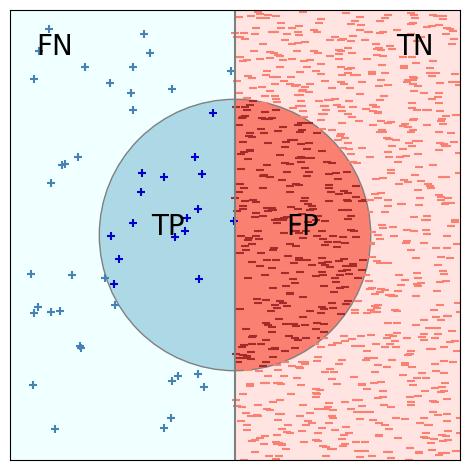

In [14]:
pos_s, neg_s, hs, fig = plot_relevant_and_retrieved(positive_proportion=p_positive, total_samples=n_samples, radius=0.3)
fig.tight_layout()
fig.savefig('all_samples.png')

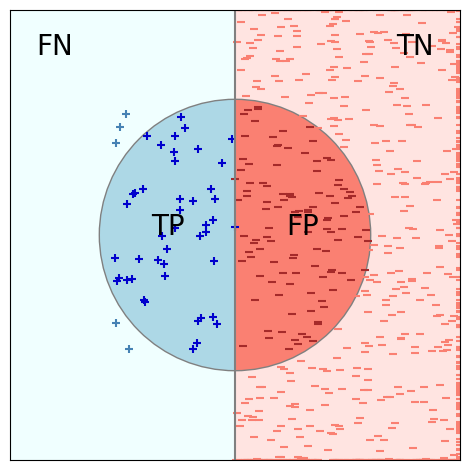

In [15]:
pos_s /= 1.7
neg_s *= 1.5
neg_s[neg_s > 0.5] = 0.5
neg_s[neg_s < -0.5] = -0.5
pos_s, neg_s, hs, fig = plot_relevant_and_retrieved(positive_proportion=p_positive, total_samples=n_samples, radius=0.3,
                                                    positive_samples=pos_s, negative_samples=neg_s)
fig.tight_layout()
fig.savefig('all_samples.png')

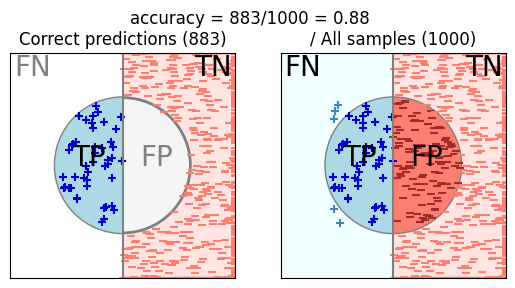

In [16]:
_, _, _, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=0.3, subset='accuracy',
                                             positive_samples=pos_s, negative_samples=neg_s, split=True)
fig.savefig('accuracy.png')

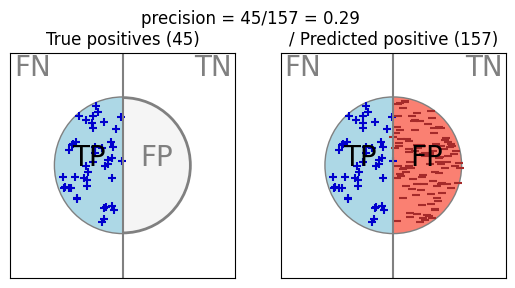

In [17]:
_, _, _, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=0.3,
                                subset='precision', split=True, positive_samples=pos_s,
                                negative_samples=neg_s)
fig.savefig('precision.png')

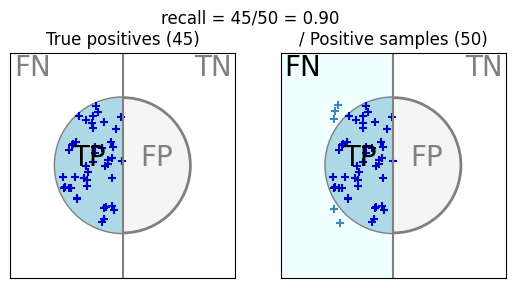

In [18]:
_, _, _, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=0.3,
                                subset='recall', split=True, positive_samples=pos_s,
                                negative_samples=neg_s)
fig.savefig('recall.png')

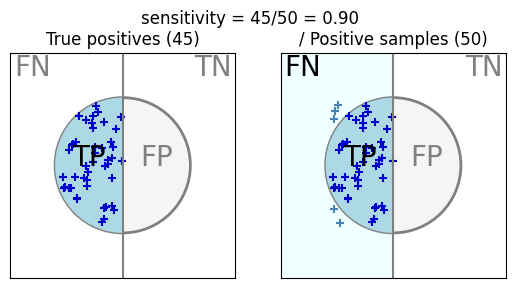

In [19]:
_, _, _, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=0.3,
                                subset='sensitivity', split=True, positive_samples=pos_s,
                                negative_samples=neg_s)
fig.savefig('sensitivity.png')

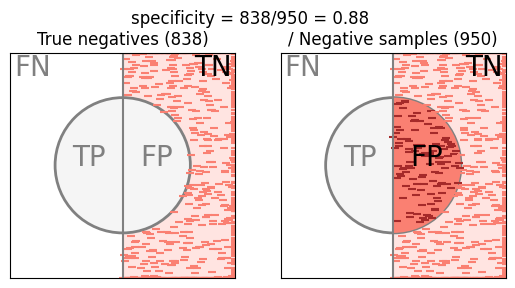

In [20]:
_, _, _, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=0.3,
                                subset='specificity', split=True, positive_samples=pos_s,
                                negative_samples=neg_s)
fig.savefig('specificity.png')

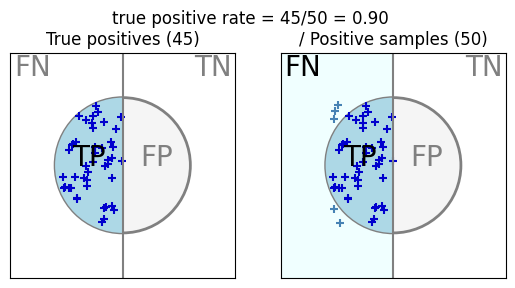

In [21]:
_, _, _, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=0.3,
                                subset='true positive rate', split=True, positive_samples=pos_s,
                                negative_samples=neg_s)
fig.savefig('true positive rate.png')

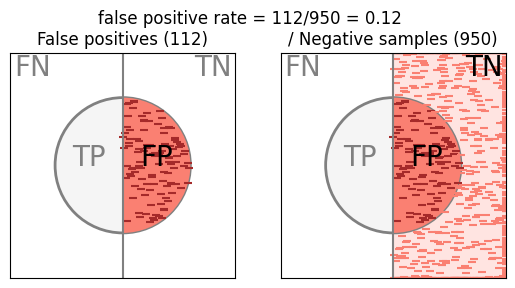

In [22]:
_, _, _, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=0.3,
                                subset='false positive rate', split=True, positive_samples=pos_s,
                                negative_samples=neg_s)
fig.savefig('false positive rate.png')

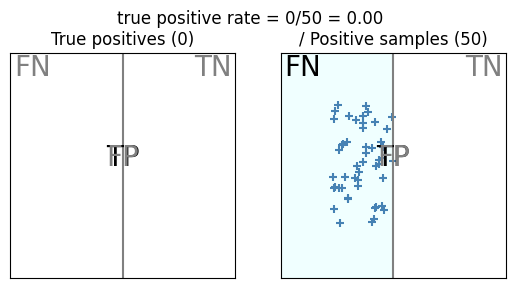

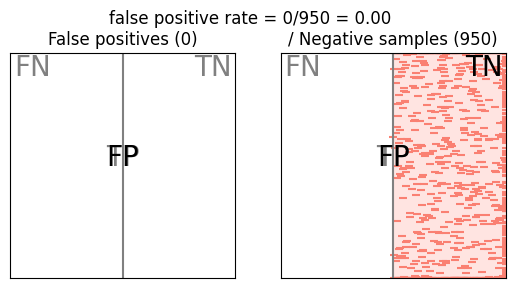

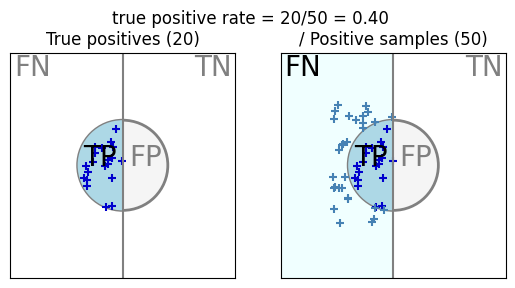

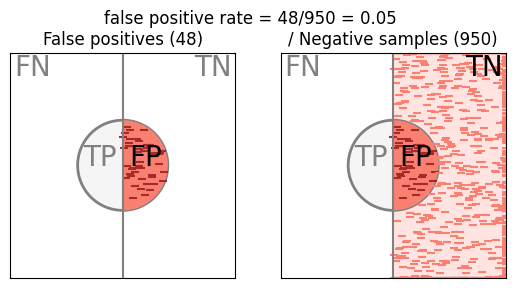

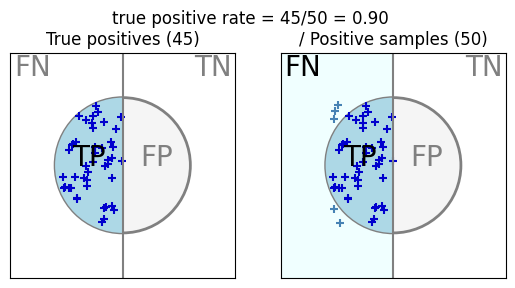

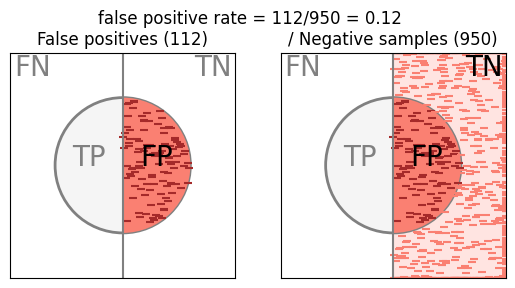

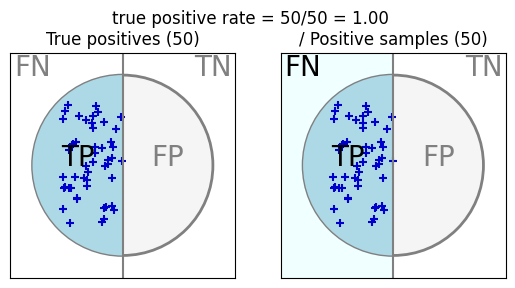

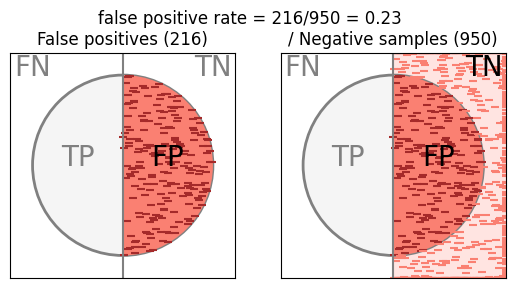

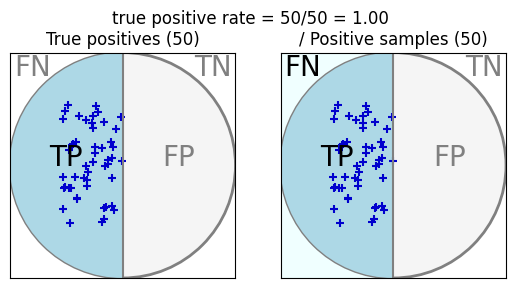

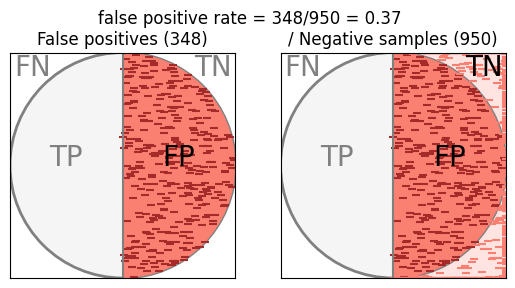

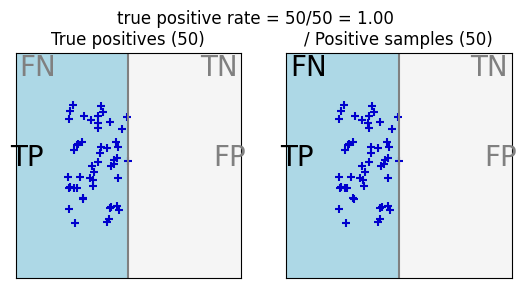

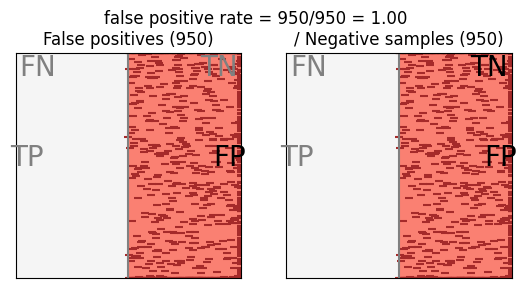

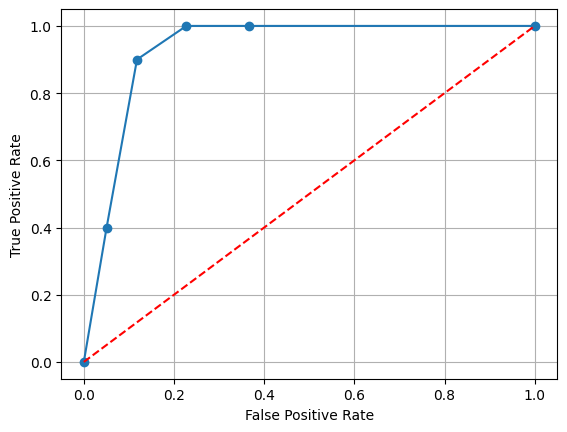

In [23]:
tpr_list = []
fpr_list = []

for radius in [0, 0.2, 0.3, 0.4, 0.5, 0.9]:
    _, _, res1, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=radius,
                                subset='true positive rate', split=True, positive_samples=pos_s,
                                negative_samples=neg_s)
    tpr_list.append(res1['TP']/(res1['TP'] + res1['FN']))
    fig.savefig(f'tpr_{radius*10:0.0f}.png')
    _, _, res2, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=radius,
                                subset='false positive rate', split=True, positive_samples=pos_s,
                                negative_samples=neg_s)
    fpr_list.append(res2['FP']/(res2['FP'] + res2['TN']))

    
    fig.savefig(f'fpr_{radius*10:0.0f}.png')

fig, ax = plt.subplots()
ax.plot(fpr_list, tpr_list, 'o-')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.plot([0, 1], [0, 1], '--', color='red')
ax.grid()
fig.savefig('roc curve.png')

/tmp/ipykernel_63113/315781658.py:117: RuntimeWarning: invalid value encountered in scalar divide
  fig.suptitle(f'{subset} = {res1['highlighted']}/{res2['highlighted']} = {res1['highlighted']/res2['highlighted']:0.2f}')
/tmp/ipykernel_63113/1161955576.py:8: RuntimeWarning: invalid value encountered in scalar divide
  precision_list.append(res1['TP']/(res1['TP'] + res1['FP']))


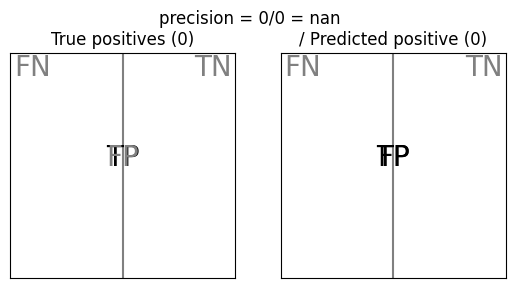

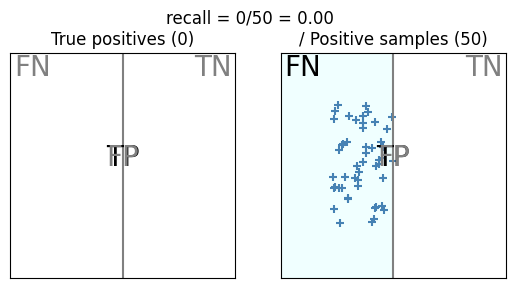

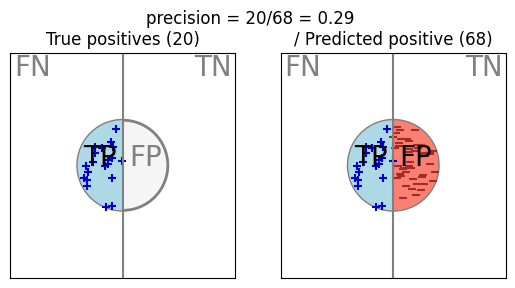

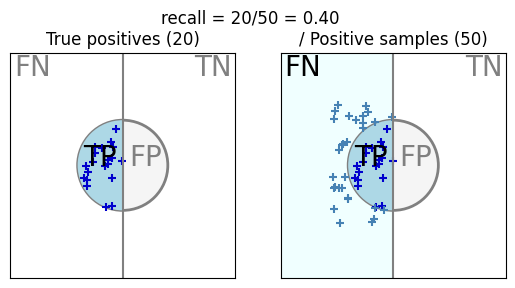

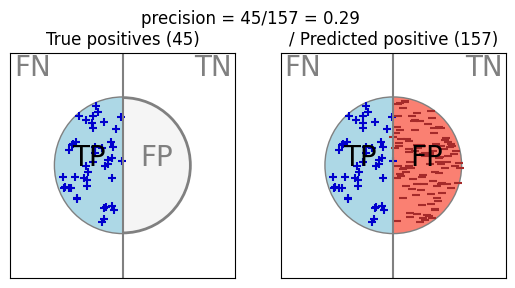

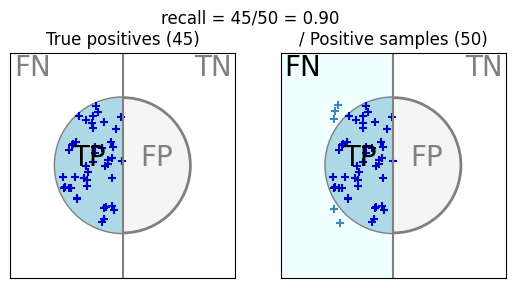

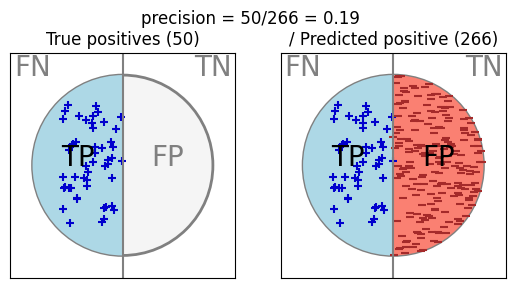

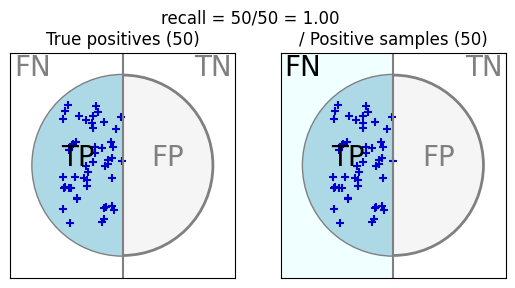

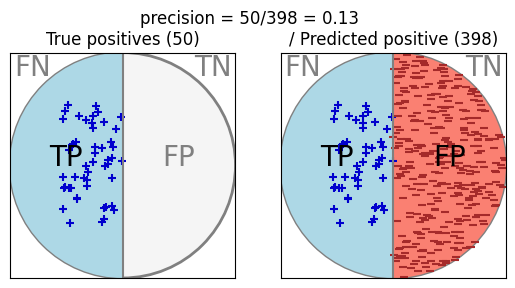

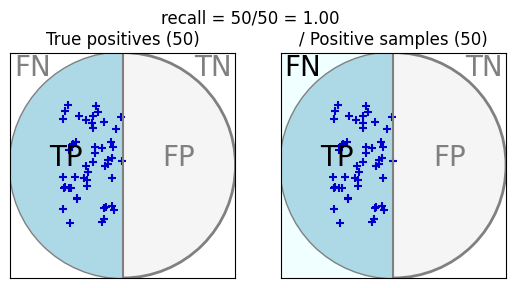

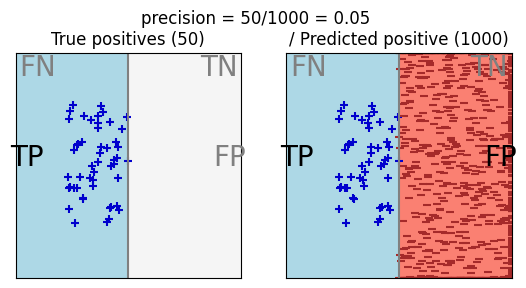

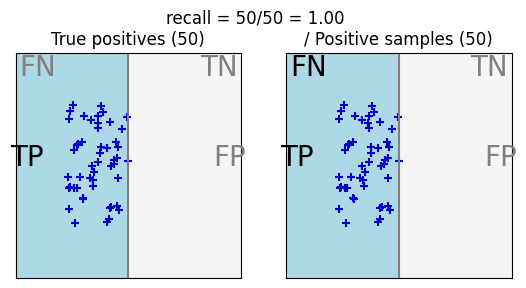

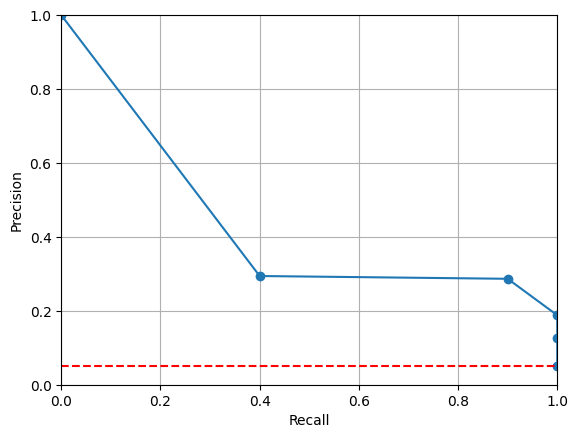

In [24]:
precision_list = []
recall_list = []

for radius in [0, 0.2, 0.3, 0.4, 0.5, 0.9]:
    _, _, res1, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=radius,
                                subset='precision', split=True, positive_samples=pos_s,
                                negative_samples=neg_s)
    precision_list.append(res1['TP']/(res1['TP'] + res1['FP']))
    if np.isnan(precision_list[-1]):
        precision_list[-1] = 1.0
    fig.savefig(f'precision_{radius*10:0.0f}.png')
    _, _, res2, fig = plot_relevant_and_retrieved(positive_proportion=0.8, total_samples=100, radius=radius,
                                subset='recall', split=True, positive_samples=pos_s,
                                negative_samples=neg_s)
    recall_list.append(res2['TP']/(res2['TP'] + res2['FN']))

    
    fig.savefig(f'recall_{radius*10:0.0f}.png')

fig, ax = plt.subplots()
ax.plot(recall_list, precision_list, 'o-')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.plot([0, 1], [p_positive, p_positive], '--', color='red')
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.grid()
fig.savefig('precision recall curve.png')